In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df["A"]=df["Annual Income (k$)"]
df["B"]=df["Spending Score (1-100)"]

In [ ]:
x=df[["A","B"]]
x.head()

,A,B
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


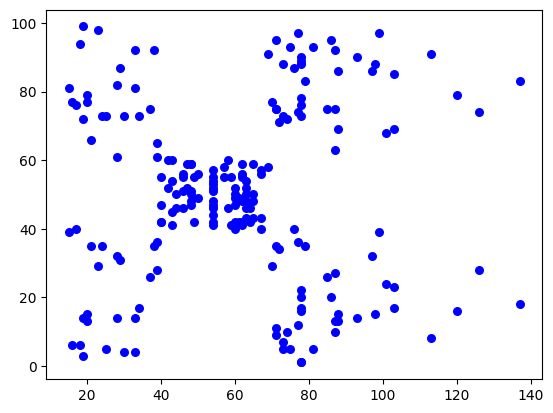

In [ ]:
plt.scatter(x["A"], x["B"], s = 30, c ='b')
plt.show()

In [ ]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(x)

centers=Kmean.cluster_centers_
print(Kmean.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[88.2        17.11428571]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [55.2962963  49.51851852]]


In [ ]:
clusters = Kmean.fit_predict(x)
df["label"]= clusters
df.head(100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),A,B,label
0,1,Male,19,15,39,15,39,3
1,2,Male,21,15,81,15,81,4
2,3,Female,20,16,6,16,6,3
3,4,Female,23,16,77,16,77,4
4,5,Female,31,17,40,17,40,3
...,...,...,...,...,...,...,...,...
95,96,Male,24,60,52,60,52,0
96,97,Female,47,60,47,60,47,0
97,98,Female,27,60,50,60,50,0
98,99,Male,48,61,42,61,42,0


In [ ]:
col=['green','Red','blue','yellow','orange']

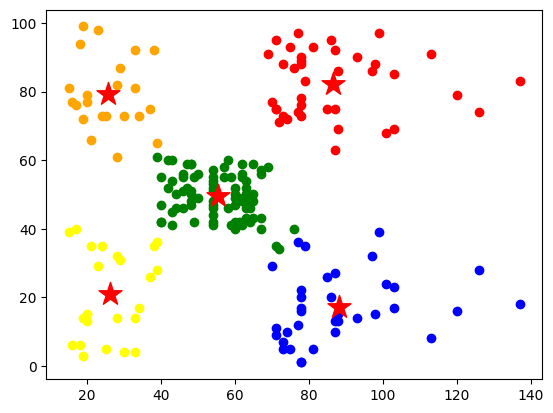

In [ ]:
for i in range(5):
  a=col[i]
  #print(a)
  plt.scatter(df.A[df.label==i], df.B[df.label==i],c=a, label='cluster 1')
plt.scatter(centers[:, 0], centers[:,1],marker='*', s=300, c='r', label='centroid')

In [ ]:
x1=x.loc[:,["A","B"]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

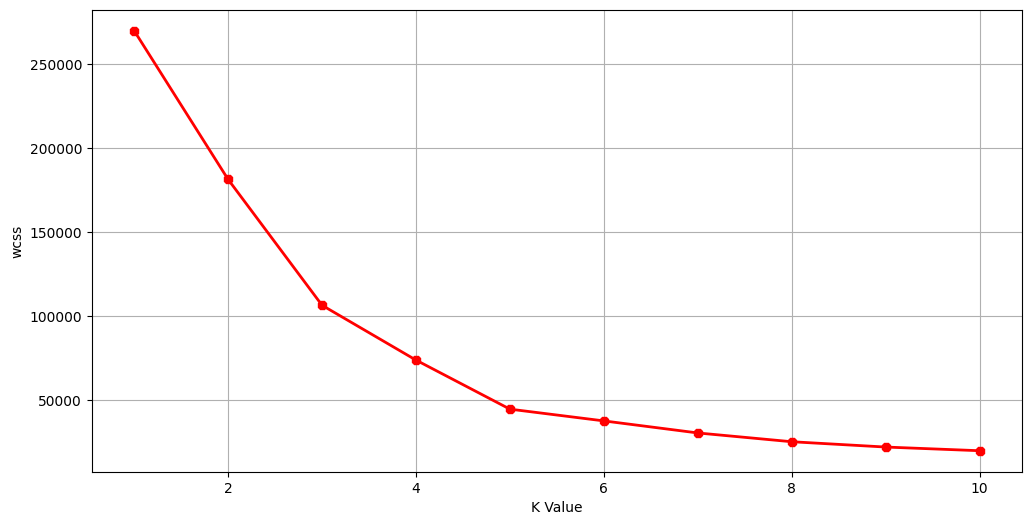

In [ ]:
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters = k, init = "k-means++")
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red",marker="8")
plt.xlabel("K Value")
plt.ylabel("wcss")
plt.show()